## Keypoint Detection
---
There are 10 images given in the ***img*** folder. Your task is to detect ***200*** keypoints for each of them using detectors.

Below are the tutorials about SIFT and Harris corners:

SIFT: https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

Harris corners: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

Let's take a look at these images first!

---

In [1]:
# load packages
import cv2
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
%matplotlib inline

/scratch/wengchic/miniconda3/envs/hw1_new/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


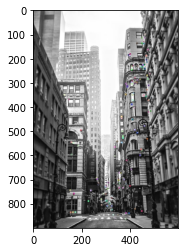

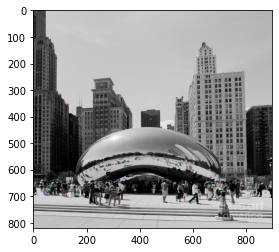

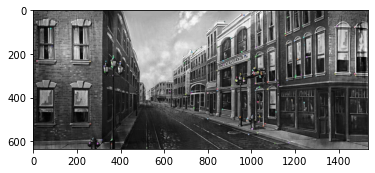

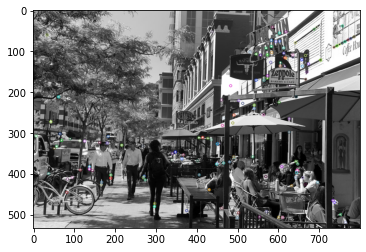

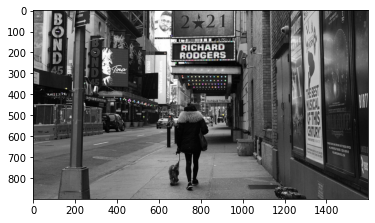

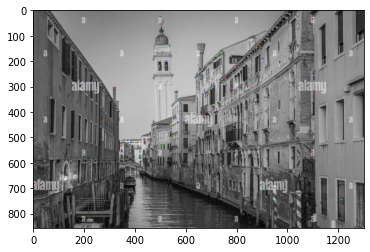

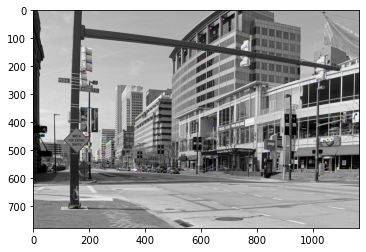

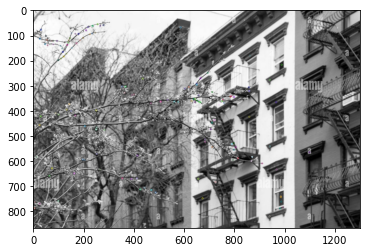

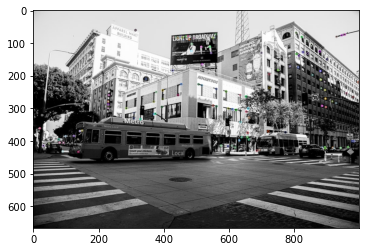

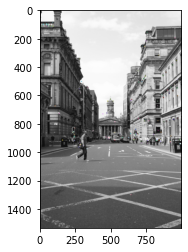

In [2]:
img_dir = "image"
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    sorted_listdir = sorted(os.listdir(img_dir), key=lambda e: [int(s) for s in re.split('[q.]', e) if s.isdigit()])
    
    for img in sorted_listdir:
        if not img.endswith("jpg"):
            continue
        image_dir = os.path.join(img_dir, img)
        image = cv2.imread(image_dir)
        gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        
        
        #SIFT Detector
        sift = cv2.SIFT_create(nfeatures = 200)
        kp = sift.detect(gray,None)
        img=cv2.drawKeypoints(gray,kp,image)
        
        
        
        #Harris Corner Detector
        #gray = np.float32(gray)
        #dst = cv2.cornerHarris(gray, 2, 3, 0.04)
        #dst = cv2.dilate(dst,None)
        
        #kp_h = []  #keypoints list
        #dst_max = [] #dst.max list
        #while len(kp_h) < 200:
            #image[dst == dst.max()]=[255, 0, 0]
            #dst_max.append(dst.max())
            #array = np.where(dst == dst.max())
            
            #for i in range(len(array[0])):
                #kp_h.append([array[0][i],array[1][i]])
            
            #dst = np.where(dst == dst.max(), 0, dst)
        
        
        plt.imshow(img)
        plt.show()
else:
    print("image folder not exists!")
    exit(0)

### The Keypoints:
The output of this part is a list of keypoints that represented by the x and y cooridnates.

For example, the 10 points of image ***3.jpg*** are:

In [58]:
#keypoints = list([(10.0, 10),  (16.0, 15.5), (15, 16), (1585, 16), (15, 1024), (100, 106), (150, 160), (715, 716), (315, 916), (815, 640)])

#kp, des = sift.detectAndCompute(gray,None)
#keypoints = []


#for i in range(len(kp)):
    #keypoints.append([kp[i].pt[0],kp[i].pt[1]])
    

#print (len(keypoints))
#print (len(kp))
    

4246
4246


Then we can obtain the patches with these keypoints:


In [3]:
def getPatches(kps, img, size=32, num=500):
    res = torch.zeros(num, 1, size, size)
    if type(img) is np.ndarray:
        img = torch.from_numpy(img)
    h, w = img.shape      # note: for image, the x direction is the verticle, y-direction is the horizontal...
    for i in range(num):
        cx, cy = kps[i]
        cx, cy = int(cx), int(cy)
        dd = int(size/2)
        xmin, xmax = max(0, cx - dd), min(w, cx + dd ) 
        ymin, ymax = max(0, cy - dd), min(h, cy + dd ) 
        
        xmin_res, xmax_res = dd - min(dd,cx), dd + min(dd, w - cx)
        ymin_res, ymax_res = dd - min(dd,cy), dd + min(dd, h - cy)

        cropped_img = img[ymin: ymax, xmin: xmax]
        ch, cw = cropped_img.shape
        res[i, 0, ymin_res: ymin_res+ch, xmin_res: xmin_res+cw] =  cropped_img
        
    return res

### Let's plot these patches

In [7]:
#img = cv2.imread('image/3.jpg')
#gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#gray = img[:, :, 0]

#patches = getPatches(keypoints, gray, size=32, num=10)
#for patch in patches:
#    img = patch[0].numpy()
#    plt.imshow(img, cmap='gray')
#    plt.show()


all_patches = []
all_keypoints = []

img_dir = "image"
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    for img in os.listdir(img_dir):
        if not img.endswith("jpg"):
            continue
        #image_dir = os.path.join(img_dir, img)
        image = cv2.imread(image_dir)
        gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        
        
        
        #SIFT Detector
        
#         sift = cv2.SIFT_create(nfeatures = 200)
#         kp, des = sift.detectAndCompute(gray,None)
#         keypoints = []
#         for i in range(len(kp)):
#             keypoints.append([kp[i].pt[0],kp[i].pt[1]])
        
#         all_keypoints.append(keypoints)
#         patches = getPatches(keypoints, gray, size=32, num=200)
#         all_patches.append(patches)
        
        #print('kp:',len(keypoints))
        #print('patch:',len(patches)) 
        
        
        #Harris Corner Detector
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray, 2, 3, 0.04)
        dst = cv2.dilate(dst,None)
        
        kp_h = []
        while len(kp_h) < 200:
            image[dst == dst.max()]=[255, 0, 0]
            array = np.where(dst == dst.max())
            
            for i in range(len(array[0])):
                kp_h.append([array[0][i],array[1][i]])
            
            dst = np.where(dst == dst.max(), 0, dst)
            #print(len(kp_h))
        
        
        all_keypoints.append(kp_h[0:200])
        patches = getPatches(kp_h, gray, size=32, num=200)
        all_patches.append(patches)
        
        #print('kp:',len(kp_h[0:200]))
        #print('patch:',len(patches)) 
        
        
        #for patch in patches:
            #image = patch[0].numpy()
            #plt.imshow(image, cmap='gray')
            #plt.show()
            

else:
    print("image folder not exists!")
    exit(0)


### Save the patches with PyTorch
For each image, you can output the patches within one tensor. In above examples, tensor ***patches*** is the one that you should store in a list. And then save the list as a "SIFT.pth" file:

In [8]:
#all_patches = []
#all_patches.append(patches)

all_patches = torch.stack(all_patches, dim=0)
all_keypoints = torch.FloatTensor(all_keypoints)

output_kps = "Harris.pth"
output_dir = "Harris_patches.pth"         # modify it to SIFT.pth or Harris.pth

torch.save(all_keypoints, output_kps)
torch.save(all_patches, output_dir)

### Test with your saved patches

In [9]:
test_patches = torch.load(output_dir)
print(type(test_patches))
print(all_keypoints.shape)
print(test_patches.shape)

# your tensor for each should have size of [10, 200, 1, 32, 32];where 10 means 10 images (in the order 1-10), 200 means 200 points.

<class 'torch.Tensor'>
torch.Size([10, 200, 2])
torch.Size([10, 200, 1, 32, 32])
